In [5]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv("insurance_data.csv")

In [9]:
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


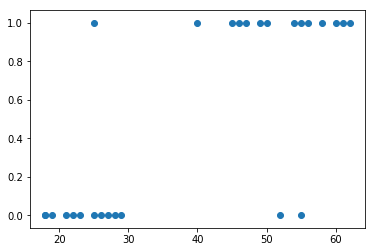

In [11]:
plt.scatter(df.age, df.bought_insurance)

In [12]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, train_size=0.9, test_size=0.1)

In [25]:
?train_test_split

In [26]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [27]:
model.fit(X_train, y_train)

/home/mighty/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
X_test

,age
20,21
18,19
1,25


In [29]:
y_preds = model.predict(X_test)

In [30]:
y_preds

array([0, 0, 0])

In [34]:
model_probs = model.predict_proba(X_test)

In [35]:
model_probs

array([[0.59719526, 0.40280474],
       [0.62140879, 0.37859121],
       [0.54743501, 0.45256499]])

In [36]:
?model.predict_proba

In [38]:
model.fit(df.age, df.bought_insurance)

/home/mighty/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Expected 2D array, got 1D array instead:
array=[22. 25. 47. 52. 46. 56. 55. 60. 62. 61. 18. 28. 27. 29. 49. 55. 25. 58.
 19. 18. 21. 26. 40. 45. 50. 54. 23.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [49]:
df[['age']][0:5]
df[['bought_insurance']][0:5]

,bought_insurance
0,0
1,0
2,1
3,0
4,1


In [50]:
model.fit(df[['age']][0:5], df[['bought_insurance']][0:5])

/home/mighty/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mighty/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [51]:
model.fit

<bound method LogisticRegression.fit of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)>

## multi-attr

In [204]:
import statsmodels.api as sm
from patsy import dmatrices
import numpy as np

In [205]:
dta = sm.datasets.fair.load_pandas().data

In [206]:
dta['affair'] = (dta.affairs > 0).astype(int)

In [207]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [208]:
#returns class and attributes as dataframes
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + occupation + occupation_husb + affairs',
                  dta, return_type="dataframe")
print (X.columns)

Index(['Intercept', 'rate_marriage', 'age', 'yrs_married', 'children',
       'religious', 'educ', 'occupation', 'occupation_husb', 'affairs'],
      dtype='object')


In [209]:
y = np.ravel(y)

In [210]:
model = LogisticRegression()
model.fit(X,y)

/home/mighty/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [93]:
dta.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs', 'affair'],
      dtype='object')

In [229]:
i=7
print(model.predict(X)[i], model.predict_proba(X)[i])

1.0 [1.24344979e-14 1.00000000e+00]


array([1.91344295e-05, 9.99980866e-01])

## gmc

In [230]:
import pandas

In [231]:
data = pandas.read_csv('gmc_data.csv')

In [232]:
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,duration_ms,time_signature,qual
0,0.572,0.532,0,-6.844,1,0.0316,0.214,0.000000,0.2840,0.607,76.033,spotify:track:6rZwsNzGS7nq8qILqdM9kX,252267,4,1
1,0.565,0.437,6,-7.680,0,0.0403,0.194,0.000007,0.0656,0.217,96.132,spotify:track:5P3yUXUC9rZPJPNmYGKEAz,236733,3,1
2,0.587,0.525,9,-9.257,0,0.1980,0.099,0.000250,0.5570,0.323,90.356,spotify:track:3ZGrUoFhNCWmm6sbFAuktX,241320,4,1
3,0.443,0.157,7,-12.818,1,0.0382,0.757,0.000000,0.1130,0.401,139.953,spotify:track:4JuYMhZk1SfhImtaHO3Sh6,194680,3,1
4,0.537,0.890,5,-5.191,1,0.0488,0.117,0.000021,0.2790,0.597,114.088,spotify:track:2Zd9awmsA8KuF65snhz7YH,231387,4,1


In [233]:
type(data.columns)

pandas.core.indexes.base.Index

In [234]:
y, X = dmatrices('qual ~ danceability + energy + key + loudness + mode + speechiness + acousticness + instrumentalness + liveness + valence + tempo + duration_ms + time_signature',
                 data, return_type="dataframe")

In [235]:
model = LogisticRegression()
model.fit(X, y)

/home/mighty/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mighty/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [236]:
model.predict(X)

array([1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1.])

In [255]:
probs = model.predict_proba(X)
probs[1:5]
res = [''] * len(probs)
for i in range(len(probs)):
    if probs[i][1] > .75:
        res[i] = 'good'
    elif probs[i][1] > .25:
        res[i] = 'okay'
    else:
        res[i] = 'bad'

In [259]:
probs

array([[0.32812057, 0.67187943],
       [0.39314498, 0.60685502],
       [0.37501905, 0.62498095],
       [0.55390095, 0.44609905],
       [0.44136955, 0.55863045],
       [0.46897589, 0.53102411],
       [0.42524413, 0.57475587],
       [0.33779777, 0.66220223],
       [0.55721638, 0.44278362],
       [0.42347397, 0.57652603],
       [0.41288419, 0.58711581],
       [0.58789152, 0.41210848],
       [0.50755399, 0.49244601],
       [0.41171733, 0.58828267],
       [0.46266939, 0.53733061],
       [0.41674556, 0.58325444],
       [0.49563643, 0.50436357],
       [0.55087784, 0.44912216],
       [0.38513471, 0.61486529],
       [0.44204588, 0.55795412],
       [0.47009452, 0.52990548],
       [0.57668779, 0.42331221],
       [0.41852659, 0.58147341],
       [0.30928123, 0.69071877],
       [0.62340456, 0.37659544],
       [0.4066303 , 0.5933697 ],
       [0.40610789, 0.59389211],
       [0.37411532, 0.62588468],
       [0.57944076, 0.42055924],
       [0.39279053, 0.60720947],
       [0.

## Saving Models

In [157]:
import pickle
import codecs

In [158]:
model_bytes = codecs.encode(pickle.dumps(model), "base64").decode()

In [160]:
type(model_bytes)

str

In [161]:
unpickled = pickle.loads(codecs.decode(model_bytes.encode(), "base64"))

In [163]:
import os
import psycopg2

In [164]:
DBNAME = os.environ["GMC_DBNAME"]
HOST = os.environ["GMC_HOST"]
PORT = os.environ["GMC_PORT"]
DBUSER = os.environ["GMC_USER"]
PASSWORD = os.environ["GMC_PASSWORD"]

In [201]:
conn = psycopg2.connect(host=HOST ,database=DBNAME, user=DBUSER, password=PASSWORD)
cur = conn.cursor()

# query = """INSERT INTO test_bytea VALUES(%s, %s)"""
# cur.execute(query, ("nothing_faith", model_bytes))

In [182]:
query = """SELECT * FROM test_bytea"""
cur.execute(query)
cur.fetchall()

[('nothing_faith',
  'gANjc2tsZWFybi5saW5lYXJfbW9kZWwubG9naXN0aWMKTG9naXN0aWNSZWdyZXNzaW9uCnEAKYFx\nAX1xAihYBwAAAHBlbmFsdHlxA1gCAAAAbDJxBFgEAAAAZHVhbHEFiVgDAAAAdG9scQZHPxo24usc\nQy1YAQAAAENxB0c/8AAAAAAAAFgNAAAAZml0X2ludGVyY2VwdHEIiFgRAAAAaW50ZXJjZXB0X3Nj\nYWxpbmdxCUsBWAwAAABjbGFzc193ZWlnaHRxCk5YDAAAAHJhbmRvbV9zdGF0ZXELTlgGAAAAc29s\ndmVycQxYBAAAAHdhcm5xDVgIAAAAbWF4X2l0ZXJxDktkWAsAAABtdWx0aV9jbGFzc3EPaA1YBwAA\nAHZlcmJvc2VxEEsAWAoAAAB3YXJtX3N0YXJ0cRGJWAYAAABuX2pvYnNxEk5YCAAAAGNsYXNzZXNf\ncRNjbnVtcHkuY29yZS5tdWx0aWFycmF5Cl9yZWNvbnN0cnVjdApxFGNudW1weQpuZGFycmF5CnEV\nSwCFcRZDAWJxF4dxGFJxGShLAUsChXEaY251bXB5CmR0eXBlCnEbWAIAAABmOHEcSwBLAYdxHVJx\nHihLA1gBAAAAPHEfTk5OSv////9K/////0sAdHEgYolDEAAAAAAAAAAAAAAAAAAA8D9xIXRxImJY\nBQAAAGNvZWZfcSNoFGgVSwCFcSRoF4dxJVJxJihLAUsBSw6GcSdoHolDcOUXVvvm8hS/S29RrOEm\nIb8/hQTV9pYbv0rXeEDez1G/o1RTE0SIEb9+r/oik44iv0CrOZm0a/W+z2nnMqAQHD/OmhRYC2zT\nPq2QQuF1rs2+vDxsSk9MIr9UrDJnlzaDv0hBhqxbzdc+VNmzatleOb9xKHRxKWJYCgAAAGludGVy\nY2VwdF9xKmgUaBVLAIVxK2gXh3EsUnEtKEsBSwGFcS

In [181]:
query = """INSERT INTO test_bytea VALUES ('nothing_faith', %s)"""
cur.execute(query, (model_bytes,))
cur.fetchall()

ProgrammingError: no results to fetch

In [176]:
query = """DELETE FROM test_bytea WHERE id='timmy'"""
cur.execute(query)
cur.fetchall()

ProgrammingError: no results to fetch

In [202]:
query = """SELECT model FROM test_bytea WHERE id=%s"""
cur.execute(query, ('nothing_faith',))
b = cur.fetchone()

In [203]:
new_model = pickle.loads(codecs.decode(b[0].encode(), "base64"))
new_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [177]:
conn.commit()
cur.close()